<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<span style="font-size: 16pt"> HW #5: Linear Models 

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> alexromsput@gmail.com</span>


<h1 align="center">Organization Info</h1> 

* Дедлайн **11 апреля 2018 02:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 594_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task5.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

<h1 align="center">Check Questions </h1> 

Ниже приводится список вопросов, с ответами на которые может быть полезно разобраться
для понимания темы.

**1.** Как выглядит решающее правило в линейной классификации? А зависимость, которой мы приближаем ответы в линейной регрессии?

**2.** Что такое функции потерь в задачах классификации и регрессии? Зачем они нужны?

**3.** Что такое регуляризаторы? Какими они бывают в задачах линейной классификации и регрессии? Зачем они нужны?

**4.** Как в общем виде выглядит оптимизационная задача в линейной классификации или линейной регрессии?

**5.** Как работает настройка весов в линейной модели с помощью SGD (Stochastic Gradient Decent)? Как выглядит правило обновления весов?

**6.** Учитывается ли коэффициент сдвига w0 в регуляризаторе? Почему?

**7.** Почему линейные модели рекомендуется применять к выборке с нормированными значениями признаков?

**8.** Как выглядит оптимизационная задача в логистической регрессии? А в SVM?

**9.** Выпишите и докажите формулу для весов в линейной регрессии (с квадратичной функцией потерь).
То же самое для гребневой регрессии.

**10.** Выпишите SGD для логистической регрессии с $l2$-регуляризацией и для SVM с линейным ядром.

**11.** В чем заключается идея ядер в SVM?

**12.** Какие преимущества и недостатки есть у линейных моделей?

**13.** На какие 3 матрицы раскладывается произвольная матрица при SVD? Что такое сингулярные числа

<h1 align="center">Contest 1 (40%)</h1> 
** Ссылка на контест: ** https://www.kaggle.com/t/68e2660e41d94d64a3c2251a1df16ab3

# Критерии оценивания
Для того чтобы получить оценку нужно
* 1) прислать код вашей модели (можно использовать только линейные модели), которая выдает один из финальных сабмиттов.
* 2) чтобы получить
    - хор (5)  и выше нужно превзойти результат benchmark_1;
    - отл (8) и выше нужно превзойти результат benchmark_2;
* 3) Ваше имя в лидерборде должно иметь вид <НомерГруппы>\_Имя\_Фамилия, например: 594\_Иван\_Иванов. Если имя не будет соответствовать формату организаторы вправе снизить оценку.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train1.csv')
y = np.array(data['label'])
data = data.drop(['id', 'label'], axis=1)
data.dropna()
data.head()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat207,feat208,feat209,feat210,feat211,feat212,feat213,feat214,feat215,feat216
0,7,0,3,0,2,3,0,6,0,5,...,3,4,2,2,0,13,0,11,1,3
1,0,11,0,0,10,1,0,0,4,0,...,0,2,0,0,2,8,1,13,0,4
2,9,0,3,0,1,3,0,4,0,6,...,48,11,2,0,0,4,0,2,0,0
3,0,9,3,2,25,0,4,0,0,1,...,1,14,1,0,0,0,3,0,17,1
4,0,0,0,0,2,5,0,0,0,12,...,3,12,0,3,0,4,0,24,4,0


In [3]:
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

x, encoders = number_encode_features(data)

In [4]:
class_ratio = np.bincount(y)[0] / np.bincount(y)[1]
print(class_ratio)

0.5706806282722513


In [5]:
test_data = pd.read_csv('test1.csv')
test_data = test_data.drop('id', axis=1)
test_data.head()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat207,feat208,feat209,feat210,feat211,feat212,feat213,feat214,feat215,feat216
0,4,2,2,0,4,2,1,2,1,0,...,4,5,3,1,0,7,1,6,2,3
1,3,3,0,0,1,2,0,9,3,3,...,8,1,0,0,1,21,0,27,2,0
2,0,0,0,2,2,8,0,1,0,9,...,3,23,0,0,0,1,0,5,1,1
3,0,0,0,0,0,0,0,7,0,9,...,9,4,0,0,0,14,0,18,1,3
4,1,2,3,0,2,0,0,13,0,3,...,2,4,0,2,0,20,0,17,1,7


# SVM:

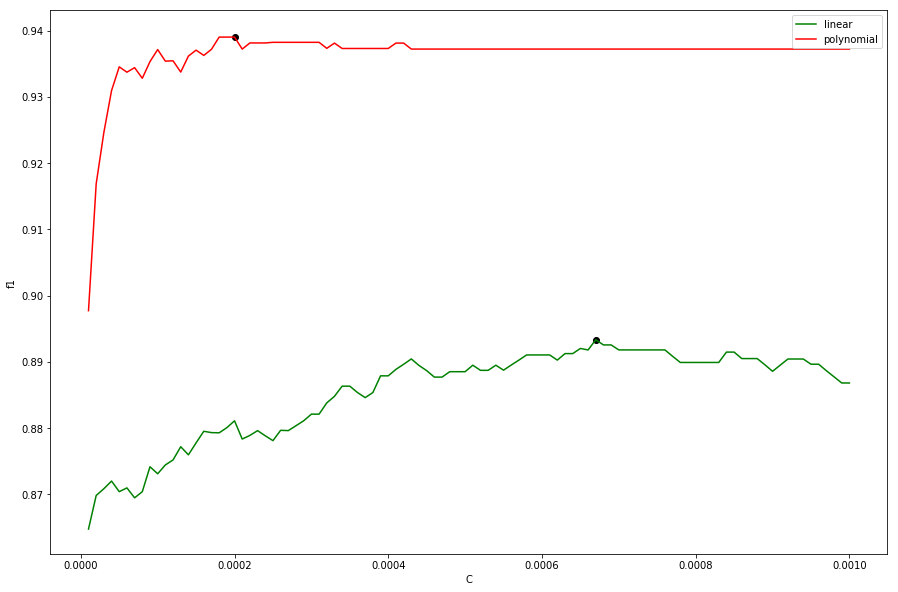

In [103]:
#kernel choice

kernels = ['linear', 'poly']
Cs = np.arange(0.00001, 0.00101, 0.00001)
scores = np.zeros([len(kernels), len(Cs)], dtype=float)

for j in range(len(kernels)):
    kernel = kernels[j]
    for i in tqdm_notebook(range(len(Cs))):
        C = Cs[i]
        model = SVC(C=C, kernel=kernel, random_state=42)
        scores[j][i] = cross_val_score(cv=5, estimator=model, X=x, y=y, scoring='f1', n_jobs=-1).mean()
    
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(Cs, scores[0], color='green', label='linear')
plt.plot(Cs, scores[1], color='red', label='polynomial')
plt.xlabel('C')
plt.ylabel('f1')
plt.scatter(Cs[scores[0].argmax()], scores[0].max(), color='black')
plt.scatter(Cs[scores[1].argmax()], scores[1].max(), color='black')
plt.legend()
plt.show()

Будем строить с полиномиальным ядром.

In [123]:
parameters = {
    'C': np.float_power(10, np.arange(-7, 4)),
    'class_weight': [None, 'balanced'],
    'degree': [4, 5]
}

In [124]:
gridsearch = GridSearchCV(
    SVC(kernel='poly', gamma='scale', random_state=42),
    param_grid=parameters,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)

In [125]:
%%time
gridsearch.fit(x, y)
print('Best score: {}, with C={}, class_weight = {} and degree = {}'.format(gridsearch.best_score_,
                                                                            gridsearch.best_params_['C'],
                                                                            gridsearch.best_params_['class_weight'],
                                                                            gridsearch.best_params_['degree']))

Best score: 0.9576621676484377, with C=0.01, class_weight = balanced and degree = 4
CPU times: user 584 ms, sys: 24.6 ms, total: 609 ms
Wall time: 6.97 s


In [127]:
best_svc = SVC(C=0.01, kernel='poly', gamma='scale', class_weight='balanced', degree=4, random_state=42)
best_svc.fit(x, y)
prediction = best_svc.predict(test_data)
indices = np.arange(1, len(prediction)+1)
df = pd.DataFrame(data=np.array([indices, prediction]).T, columns=['id', 'label'])
df.to_csv(path_or_buf='sub1.csv', sep=',', index=False)

#private: 0.91305
#public: 0.91199

<h1 align="center">Contest 2 (40%)</h1> 
* Ссылка на контест: https://www.kaggle.com/t/2343d1882c6842258e3825b4a8a1e5a8

# Критерии оценивания
Для того чтобы получить оценку нужно
* 1) Прислать код вашей модели, которая выдает один из финальных сабмиттов.
* 2) чтобы получить
    - хор (5)  и выше нужно превзойти результат benchmark_1;
    - отл (8) и выше нужно превзойти результат benchmark_2;
* 3) Ваше имя в лидерборде должно иметь вид <НомерГруппы>\_Имя\_Фамилия, например: 594\_Иван\_Иванов. Если имя не будет соответствовать формату организаторы вправе снизить оценку.

# SVC:

In [70]:
import re
from sklearn.svm import LinearSVC

In [104]:
data = pd.read_csv('train2.csv')
y = np.array(data['sentiment'])

sentiments = np.unique(y)
encoder = {'anger': 0, 'boredom': 1, 'empty': 2, 'enthusiasm': 3, 'fun': 4, 'happiness': 5, 'hate': 6,
           'love': 7, 'neutral': 8, 'relief': 9, 'sadness': 10, 'surprise': 11, 'worry': 12}
y = np.array([encoder[i] for i in y])
print(y.shape)

data = data.drop(['Unnamed: 0', 'sentiment'], axis=1)
data.dropna()
print(data.shape)
data.head()

(30000,)
(30000, 2)


,author,content
0,richardepryor,"@treasaint salad stuff, some chillis, whatever..."
1,reese,"@sunnyjamiel sunny, I'm a workin' on it. It's ..."
2,mutedriposte,@jolynnchew so early??
3,sakizzie_1102,"So now, I have conjunctivitis in my left eye. ..."
4,poptrash,"Out and about in Deal, Kent. More sunshine req..."


In [107]:
print(sentiments)

['anger' 'boredom' 'empty' 'enthusiasm' 'fun' 'happiness' 'hate' 'love'
 'neutral' 'relief' 'sadness' 'surprise' 'worry']


In [99]:
test_data = pd.read_csv('test2.csv')
ids = np.array(test_data['id'])
test_data = test_data.drop('id', axis=1)
print(test_data.shape)
test_data.head()

(10000, 2)


,author,content
0,valicast,Good Morning
1,btb103,I just put my computer up on craigslist. I've ...
2,anavil,in ten minutes shopping demi lovato-back aro...
3,ritwik1st,From twitterberry moved to ubertwitter - suffe...
4,TightFreebies,@thriftymom TEAR*


In [91]:
words = {}
for _, row in tqdm_notebook(data.iterrows()):
    text = list(filter(lambda x: len(x) > 1 and x[0] != '@', re.split("[^a-z@]", row.content.lower())))
    for word in text:
        if word not in words.keys():
            words[word] = 1
        else:
            words[word] += 1

In [132]:
words_indices = dict()
cnt = 0
for word in words.keys():
    if words[word] > 1:
        words_indices[word] = cnt
        cnt += 1

In [133]:
#generation of new data

x = np.zeros([len(data), len(words_indices)], dtype=int)

i = 0
for _, row in tqdm_notebook(data.iterrows()):
    text = list(filter(lambda x: len(x) > 1 and x[0] != '@', re.split("[^a-z@]", row.content.lower())))
    for word in text:
        if word in words_indices.keys():
            x[i][words_indices[word]] += 1
    i += 1

print(x.shape)

(30000, 10809)


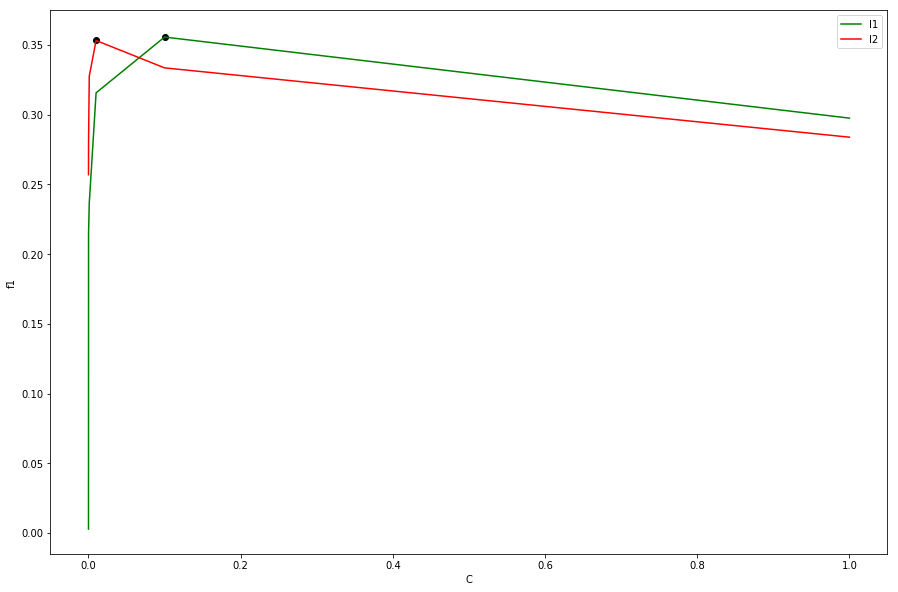

In [134]:
penalties = ['l1', 'l2']
Cs = np.float_power(10, np.arange(-5, 1))
scores = np.zeros([len(penalties), len(Cs)], dtype=float)

for j in range(len(penalties)):
    penalty = penalties[j]
    for i in tqdm_notebook(range(len(Cs))):
        C = Cs[i]
        model = LinearSVC(C=C, penalty=penalty, dual=False, random_state=42)
        scores[j][i] = cross_val_score(cv=3, estimator=model, X=x, y=y, scoring=None,
                                       n_jobs=-1).mean()
    
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(Cs, scores[0], color='green', label='l1')
plt.plot(Cs, scores[1], color='red', label='l2')
plt.xlabel('C')
plt.ylabel('f1')
plt.scatter(Cs[scores[0].argmax()], scores[0].max(), color='black')
plt.scatter(Cs[scores[1].argmax()], scores[1].max(), color='black')
plt.legend()
plt.show()

In [135]:
print(scores[0].max(), Cs[scores[0].argmax()])
print(scores[1].max(), Cs[scores[1].argmax()])

0.3556327208458547 0.1
0.3531656972507786 0.01


In [136]:
#C=0.1, penalty='l1'

x_test = np.zeros([len(test_data), len(words_indices)], dtype=int)

i = 0
for _, row in tqdm_notebook(test_data.iterrows()):
    text = list(filter(lambda x: len(x) > 1 and x[0] != '@', re.split("[^a-z@]", row.content.lower())))
    for word in text:
        if word in words_indices.keys():
            x_test[i][words_indices[word]] += 1
    i += 1

print(x_test.shape)

best_SVC = LinearSVC(C=0.1, penalty='l1', dual=False, random_state=42)
best_SVC.fit(x, y)
prediction = best_SVC.predict(x_test)
df = pd.DataFrame(data=np.array([ids, sentiments[prediction]]).T, columns=['id', 'sentiment'])
df.to_csv(path_or_buf='sub2.csv', sep=',', index=False)

#private: 0.36200
#public: 0.35300

(10000, 10809)


<h1 align="center">Теоретические задачи (20%)</h1> 

** Задача 1**
Покажите, что регуляризатор в задаче линейной классификации имеет вероятностный смысл априорного распределения параметров моделей. Какие распределения задают 𝑙1-регуляризатор и 𝑙2-регуляризатор?

** Задача 2**
Покажите, что в случае линейно разделимой выборки функционал, максимизируемый при обучении логистической регрессии, достигает своего максимума в бесконечности (при бесконечно больших значениях компонент вектора весов), а значит для процесса обучения необходимо добавить регуляризационный член.

** Задача 3**
Задана выборка объектов, каждый из которых принадлежит одному из двух классов $Y = \{1; -1\}$. В некотором спрямляющем пространстве, задаваемом ядром $K_1(x_1; x_2)$, эта выборка является линейно разделимой, а в некотором спрямляющем пространстве, задаваемом ядром $K_2(x_1; x_2)$, не является линейно разделимой. Существует ли спрямляемое пространство, задаваемое ядром $K(x_1; x_2) = K_1(x_1; x_2) + K_2(x_1; x_2)$, в котором эта выборка будет линейно разделимой?

**Решение:** Пусть $K_{1}(x_1, x_2)$ и $K_{2}(x_1, x_2)$ - это скалярные произведения в пространстве признаков, заданные формулами $K_{1}(x_1, x_2) = (\phi_{1}(x_1), \phi_{1}(x_2)), K_{2}(x_1, x_2) = (\phi_{2}(x_1), \phi_{2}(x_2)),$ где $\phi_{1}$ и $\phi_{2}$ - преобразования из пространства признаков в спрямляющие пространства. Из условия линейной разделимости в первом спрямляющем протсранстве следует существование такого вектора весов $w_{1},$ что $$\forall i \in [1..l] \rightarrow y_{i}\cdot (w_{1}, \phi_{1}(x_{i})) > 0.$$ Возьмем в качестве нового спрямляемого пространства с ядром $K$ декартово произведение первого и второго спрямляющих пространств, задаваемое преобразованием $\phi(x) = \phi((x_1, x_2)) = (\phi_{1}(x_1), \phi_{2}(x_2)).$ $$\forall \phi, \psi \rightarrow (\phi, \psi) = ((\phi_{1}, \phi_{2}), (\psi_{1}, \psi_{2})) = (\phi_{1}, \psi_{1}) + (\phi_{2}, \psi_{2}) = K_1 + K_2.$$ Возьмем в качетсве нового весового вектора $w = (w_{1}, 0),$ тогда $$\forall i \in [1..l] \rightarrow y_{i}\cdot (w, \phi(x_{i})) = y_{i}\cdot((w_{1}, 0), (\phi_{1}(x_{i}), \phi_{2}(x_{i}))) = y_{i}\cdot((w_{1} \cdot \phi_{1}(x_{i}) + 0 \cdot \phi_{2}(x_{i})) = y_{i}\cdot (w_{1}, \phi_{1}(x_{i})) > 0,$$ т. е. в построенном нами пространстве выборка линейно разделима.

**Задача 4** Покажите, что если предварительно центрировать выборку в задаче линейной регрессии, то параметр сдвига $𝑤_0$ (коэффициент перед константой) получится равным нулю.